# Read the prediction

In [27]:
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt

path = '/home/jovyan/work/gns-fragment/rollouts/Fragment/Step-0-100-3/rollout_0.pkl'

with open(path, "rb") as file:
    rollout_data = pickle.load(file)

init_pos = rollout_data['initial_positions']
pred_pos = rollout_data['predicted_rollout']
gt_pos = rollout_data['ground_truth_rollout']
gt_pos = np.concatenate((init_pos, gt_pos), axis=0)
pred_pos = np.concatenate((init_pos, pred_pos), axis=0)

init_strain = rollout_data['initial_strains']
pred_strain = rollout_data['predicted_strain']
gt_strain = rollout_data['ground_truth_strain']
# gt_strain = np.concatenate((init_strain, gt_strain), axis=0)
# pred_strain = np.concatenate((init_strain, pred_strain), axis=0)

particle_type = rollout_data['particle_types']

print(gt_pos.shape, pred_strain.shape, gt_strain.shape, particle_type.shape)

(34, 123069, 3) (34, 123069) (34, 123069) (123069,)


# Random ploting beam displacement

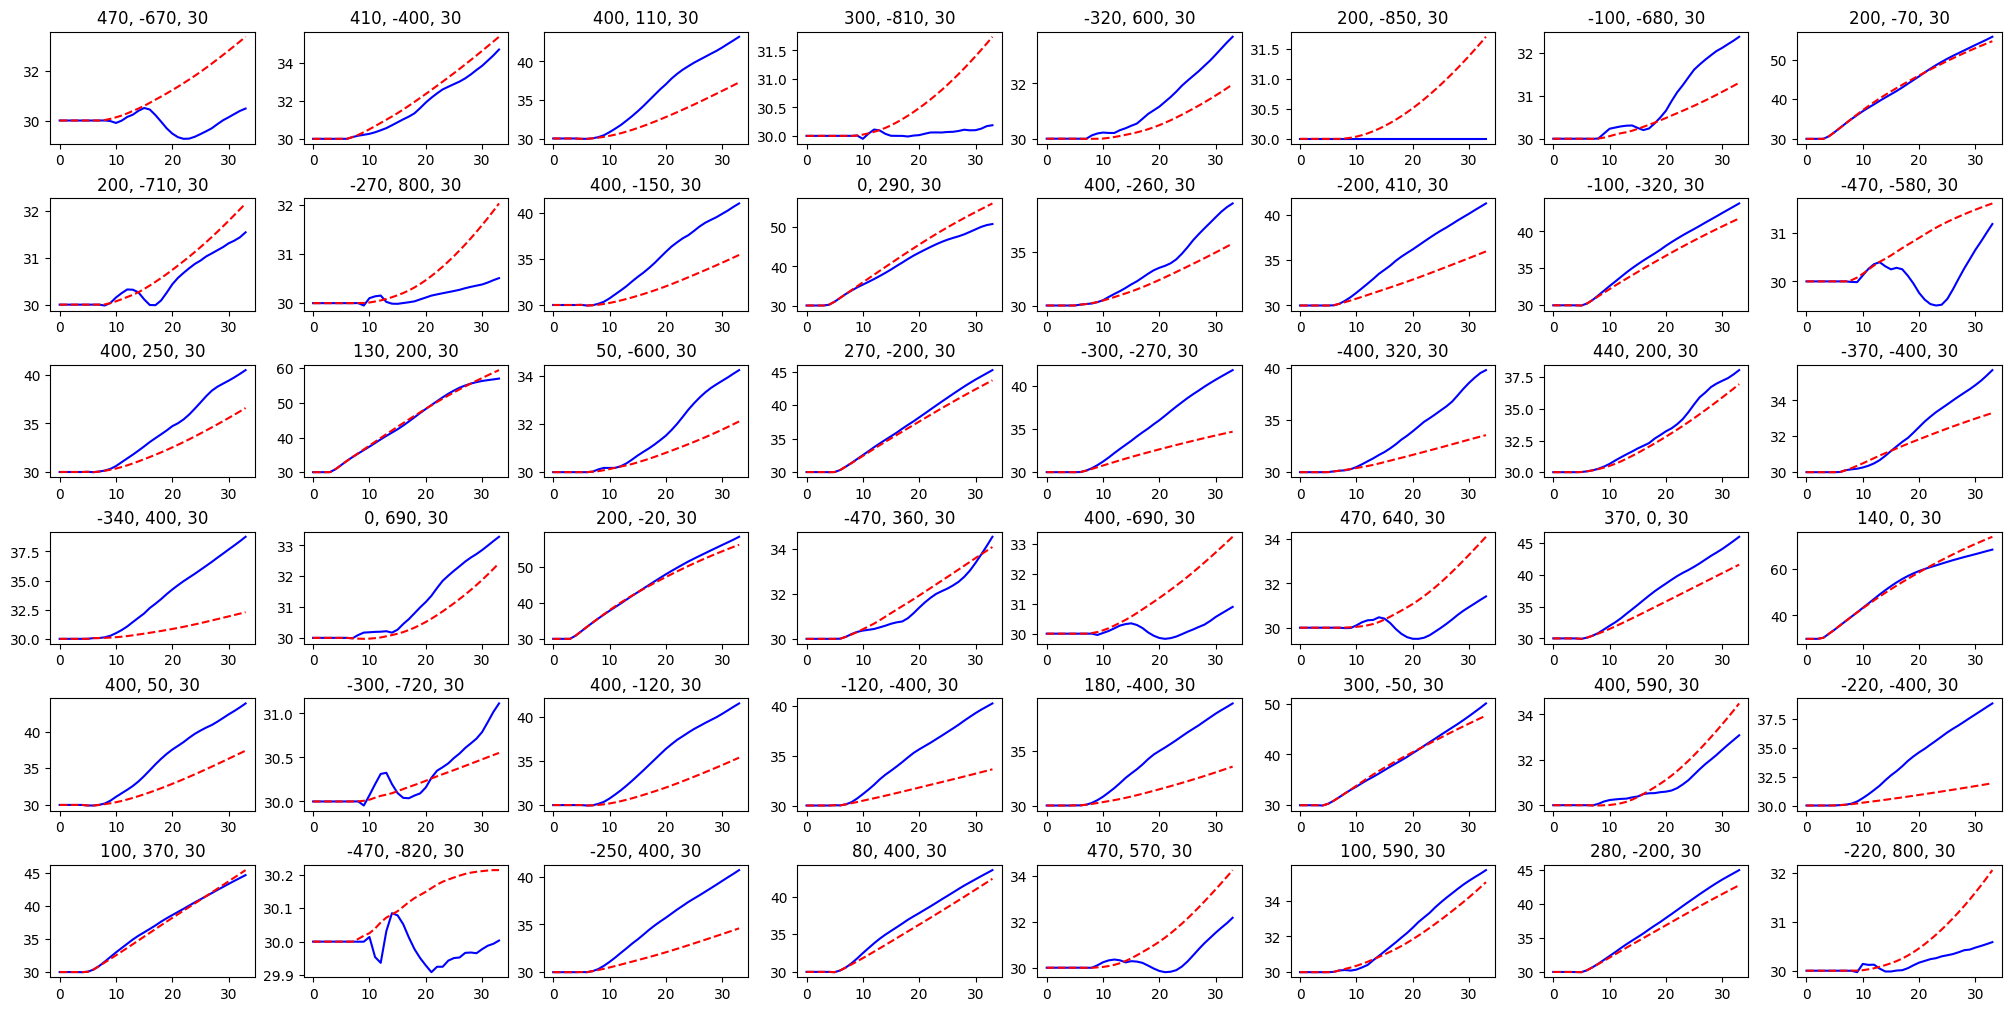

In [29]:
fig = plt.figure(figsize=(20,10), constrained_layout=True)
a = np.where(particle_type==1)[0]
idx = np.random.choice(a, 48)

for fig_id in range(48):
    ax = fig.add_subplot(6, 8, fig_id+1)
    x, y, z = gt_pos[0, idx[fig_id]]
    x, y, z = int(x), int(y), int(z)
    ax.set_title(f'{x}, {y}, {z}')
    ax.plot(gt_pos[:, idx[fig_id], 2], 'b')
    ax.plot(pred_pos[:, idx[fig_id], 2], 'r--')

# Random plotting z displacement

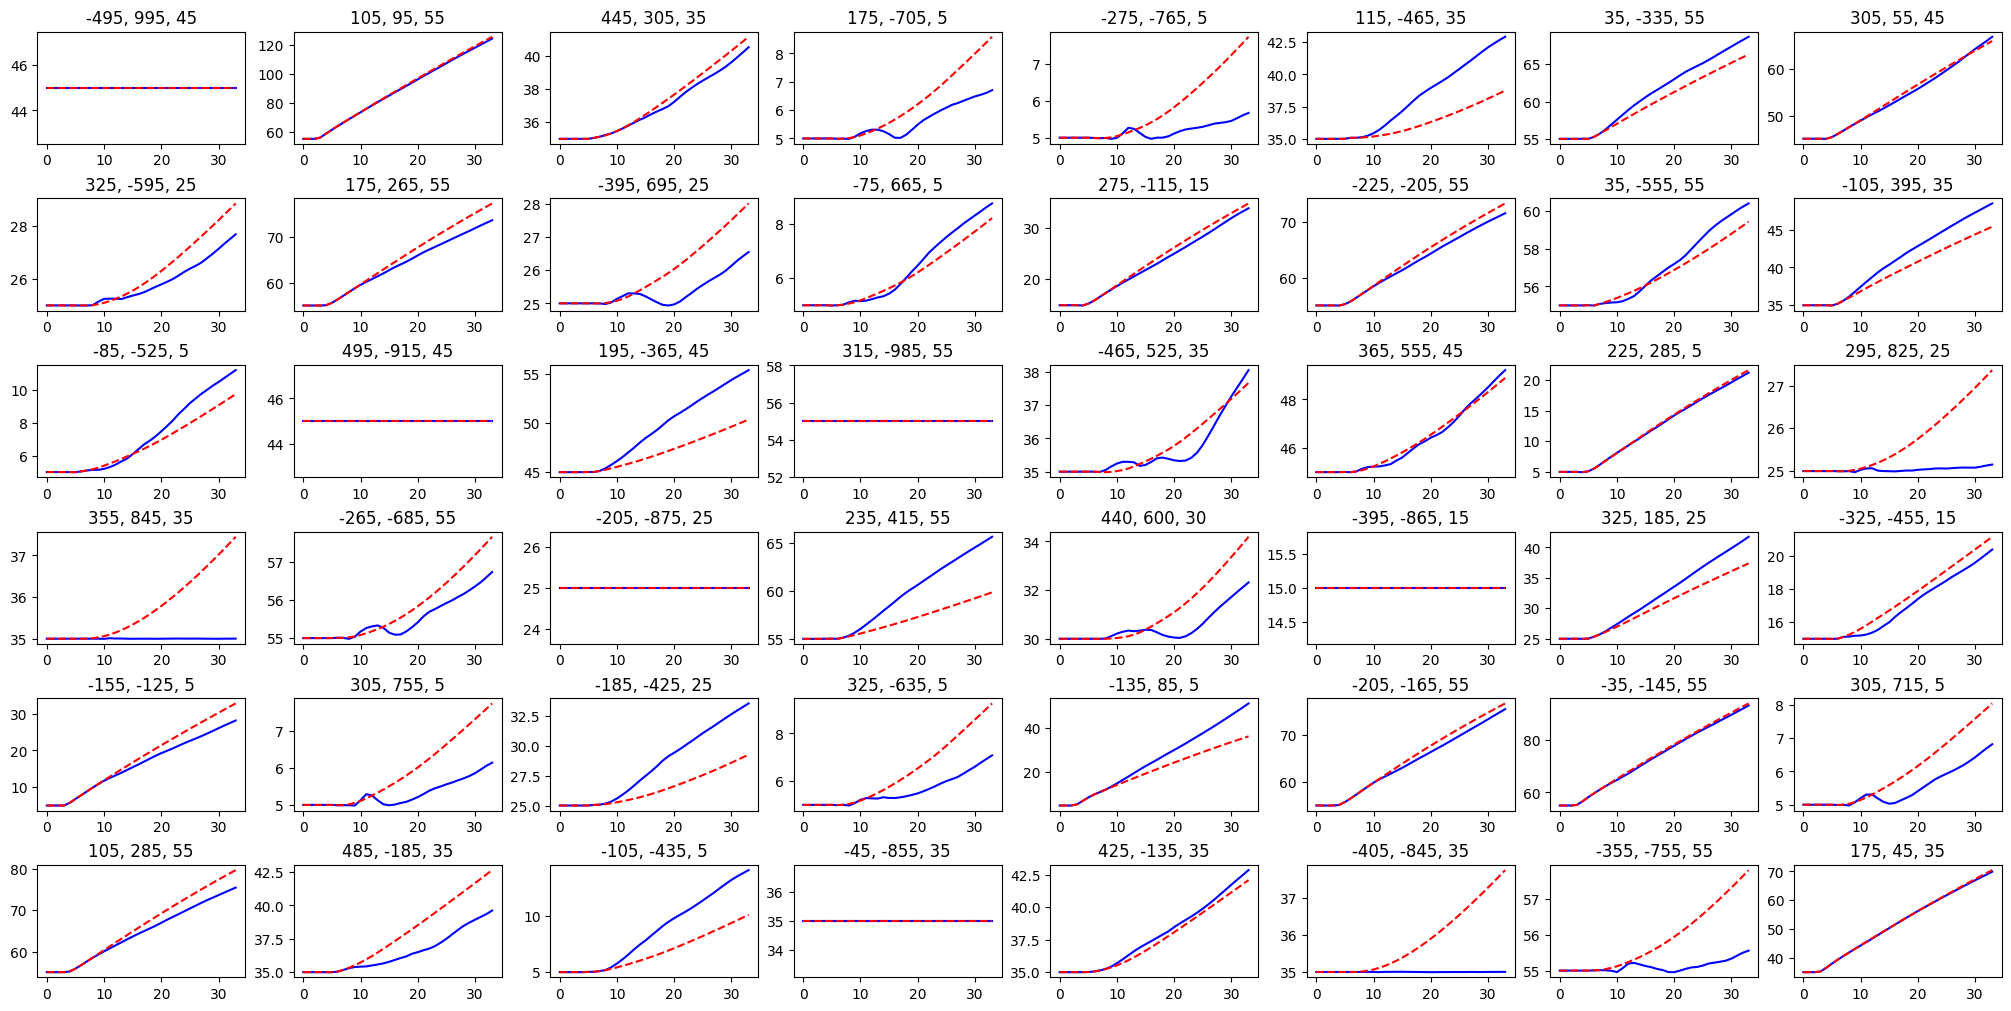

In [30]:
fig = plt.figure(figsize=(20,10), constrained_layout=True)
idx = random.sample(range(123068), 48)

for fig_id in range(48):
    ax = fig.add_subplot(6, 8, fig_id+1)
    x, y, z = gt_pos[0, idx[fig_id]]
    x, y, z = int(x), int(y), int(z)
    ax.set_title(f'{x}, {y}, {z}')
    ax.plot(gt_pos[:, idx[fig_id], 2], 'b')
    ax.plot(pred_pos[:, idx[fig_id], 2], 'r--')

# Random ploting velocity

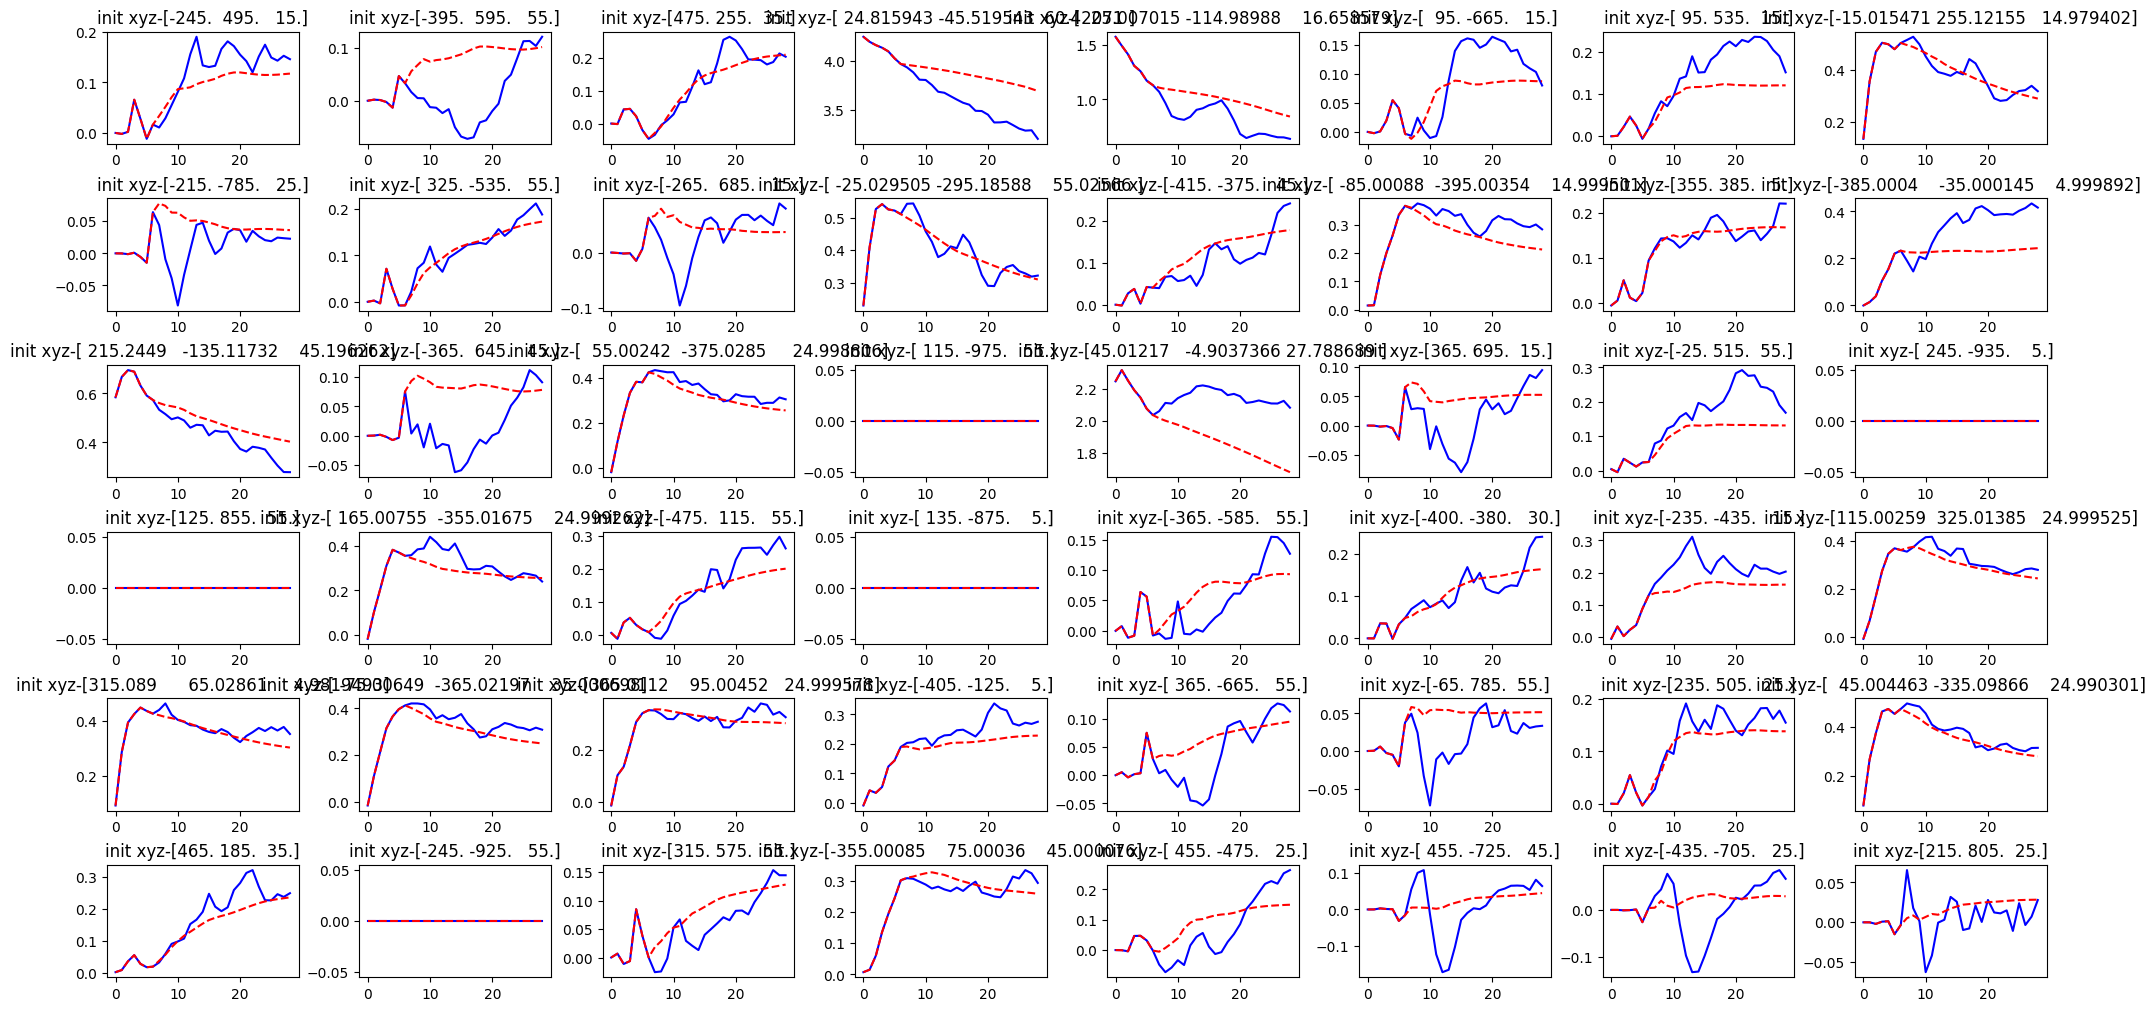

In [21]:
pred_vel = pred_pos[1:, :, :] - pred_pos[:-1, :, :]
gt_vel = gt_pos[1:, :, :] - gt_pos[:-1, :, :]

fig = plt.figure(figsize=(20,10), constrained_layout=True)
idx = random.sample(range(123068), 48)

for fig_id in range(48):
    ax = fig.add_subplot(6, 8, fig_id+1)
    ax.set_title(f'init xyz-{gt_pos[0, idx[fig_id]]}')
    ax.plot(gt_vel[:, idx[fig_id], 2], 'b')
    ax.plot(pred_vel[:, idx[fig_id], 2], 'r--')

# Random ploting acc

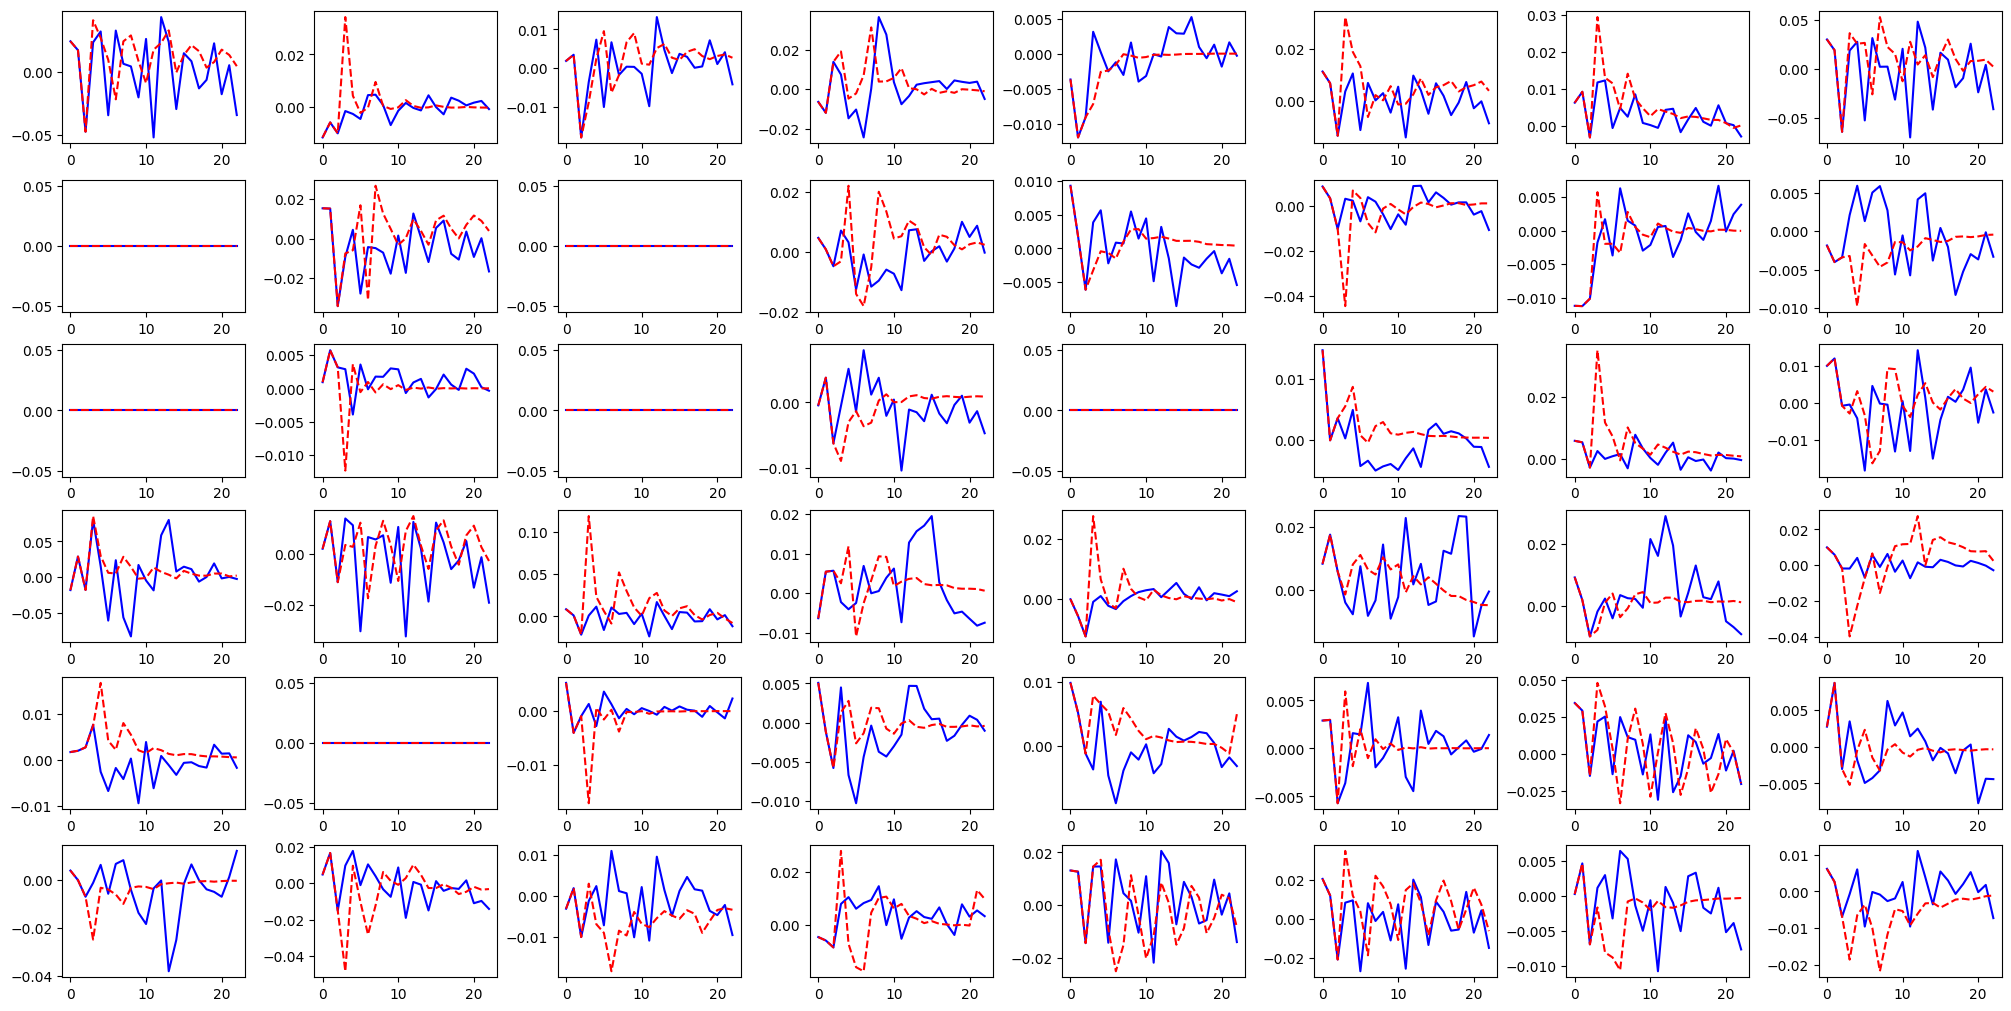

In [117]:
pred_acc = pred_vel[1:, :, :] - pred_vel[:-1, :, :]
gt_acc = gt_vel[1:, :, :] - gt_vel[:-1, :, :]

fig = plt.figure(figsize=(20,10), constrained_layout=True)
idx = random.sample(range(123068), 48)

for fig_id in range(48):
    ax = fig.add_subplot(6, 8, fig_id+1)
    ax.set_title(f'init xyz-{gt_pos[0, idx[fig_id]]}')
    ax.plot(gt_acc[:, idx[fig_id], 2], 'b')
    ax.plot(pred_acc[:, idx[fig_id], 2], 'r--')

# Random ploting strain

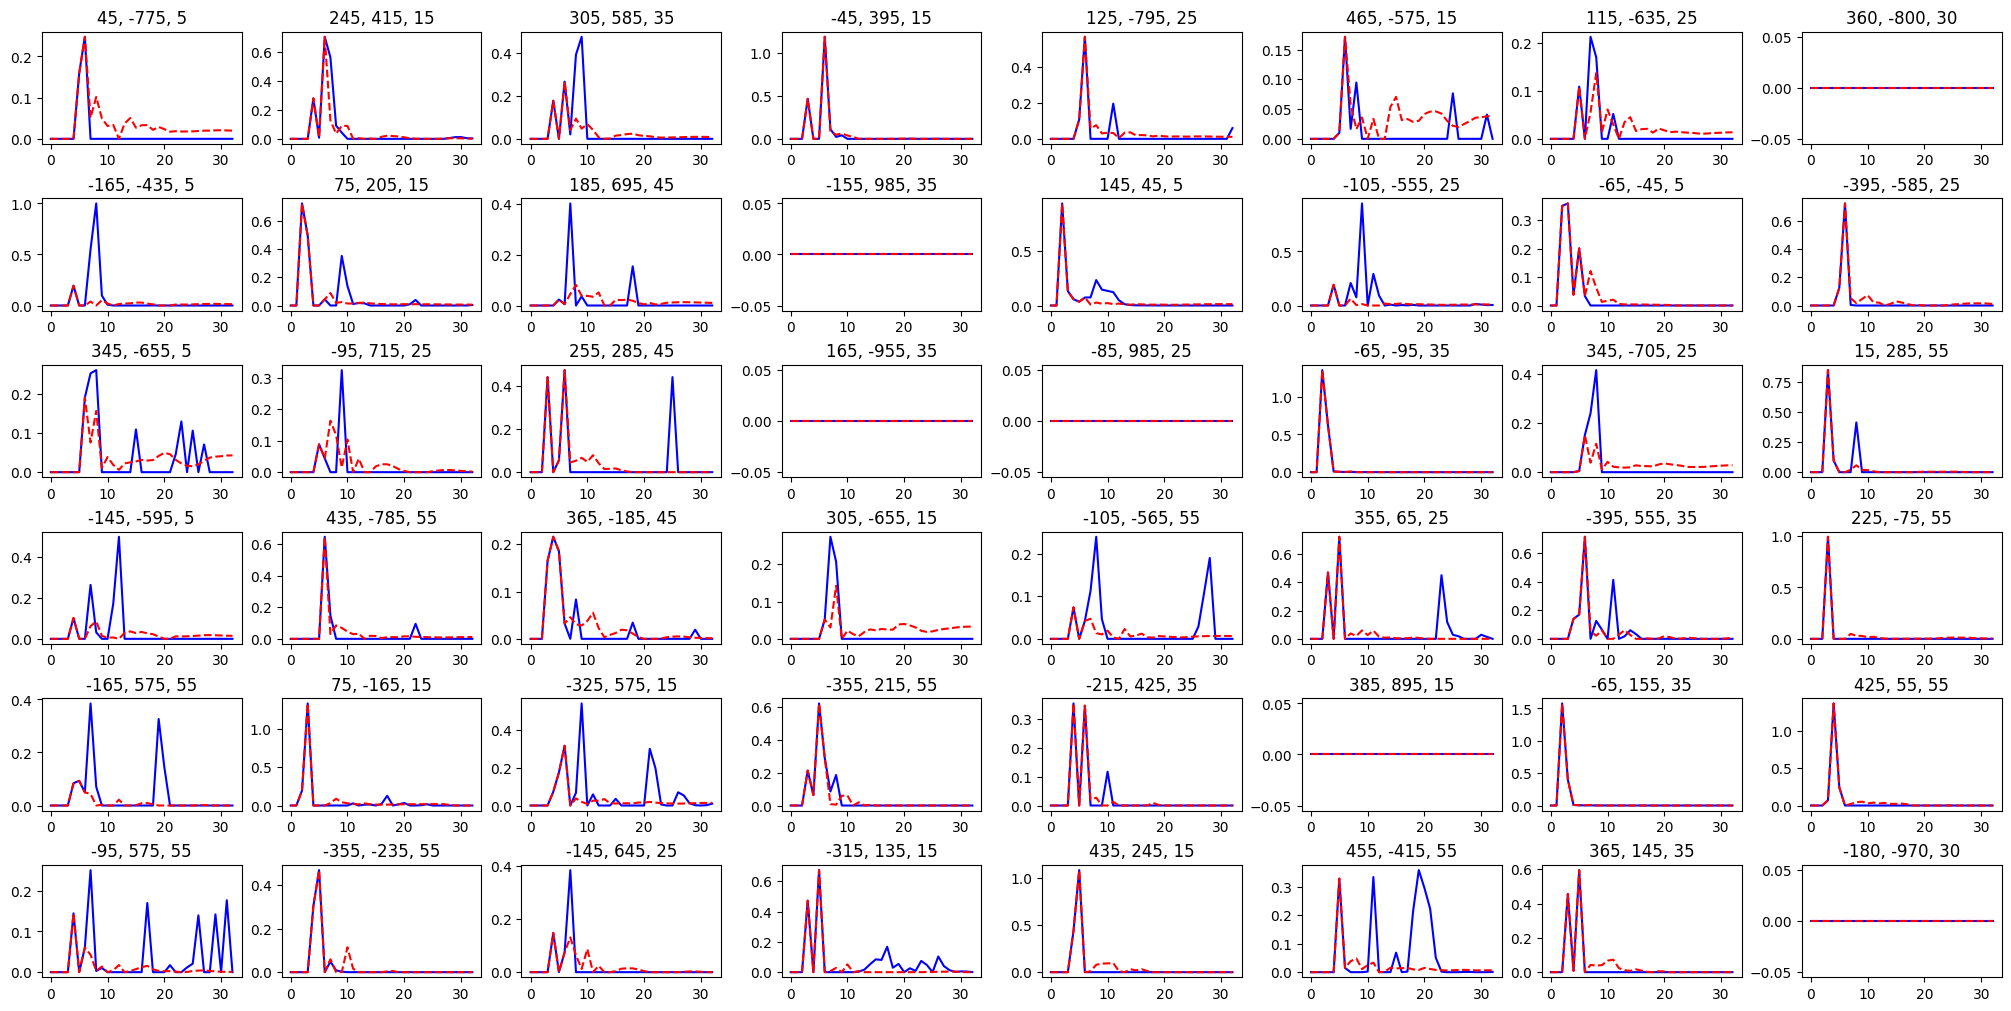

In [31]:
fig = plt.figure(figsize=(20,10), constrained_layout=True)
idx = random.sample(range(123068), 48)

for fig_id in range(48):
    ax = fig.add_subplot(6, 8, fig_id+1)
    x, y, z = gt_pos[0, idx[fig_id]]
    x, y, z = int(x), int(y), int(z)
    ax.set_title(f'{x}, {y}, {z}')
    ax.plot(gt_strain[1:, idx[fig_id]]-gt_strain[:-1, idx[fig_id]], 'b')
    ax.plot(pred_strain[1:, idx[fig_id]]-pred_strain[:-1, idx[fig_id]], 'r--')

# Random ploting gt strain from step 0

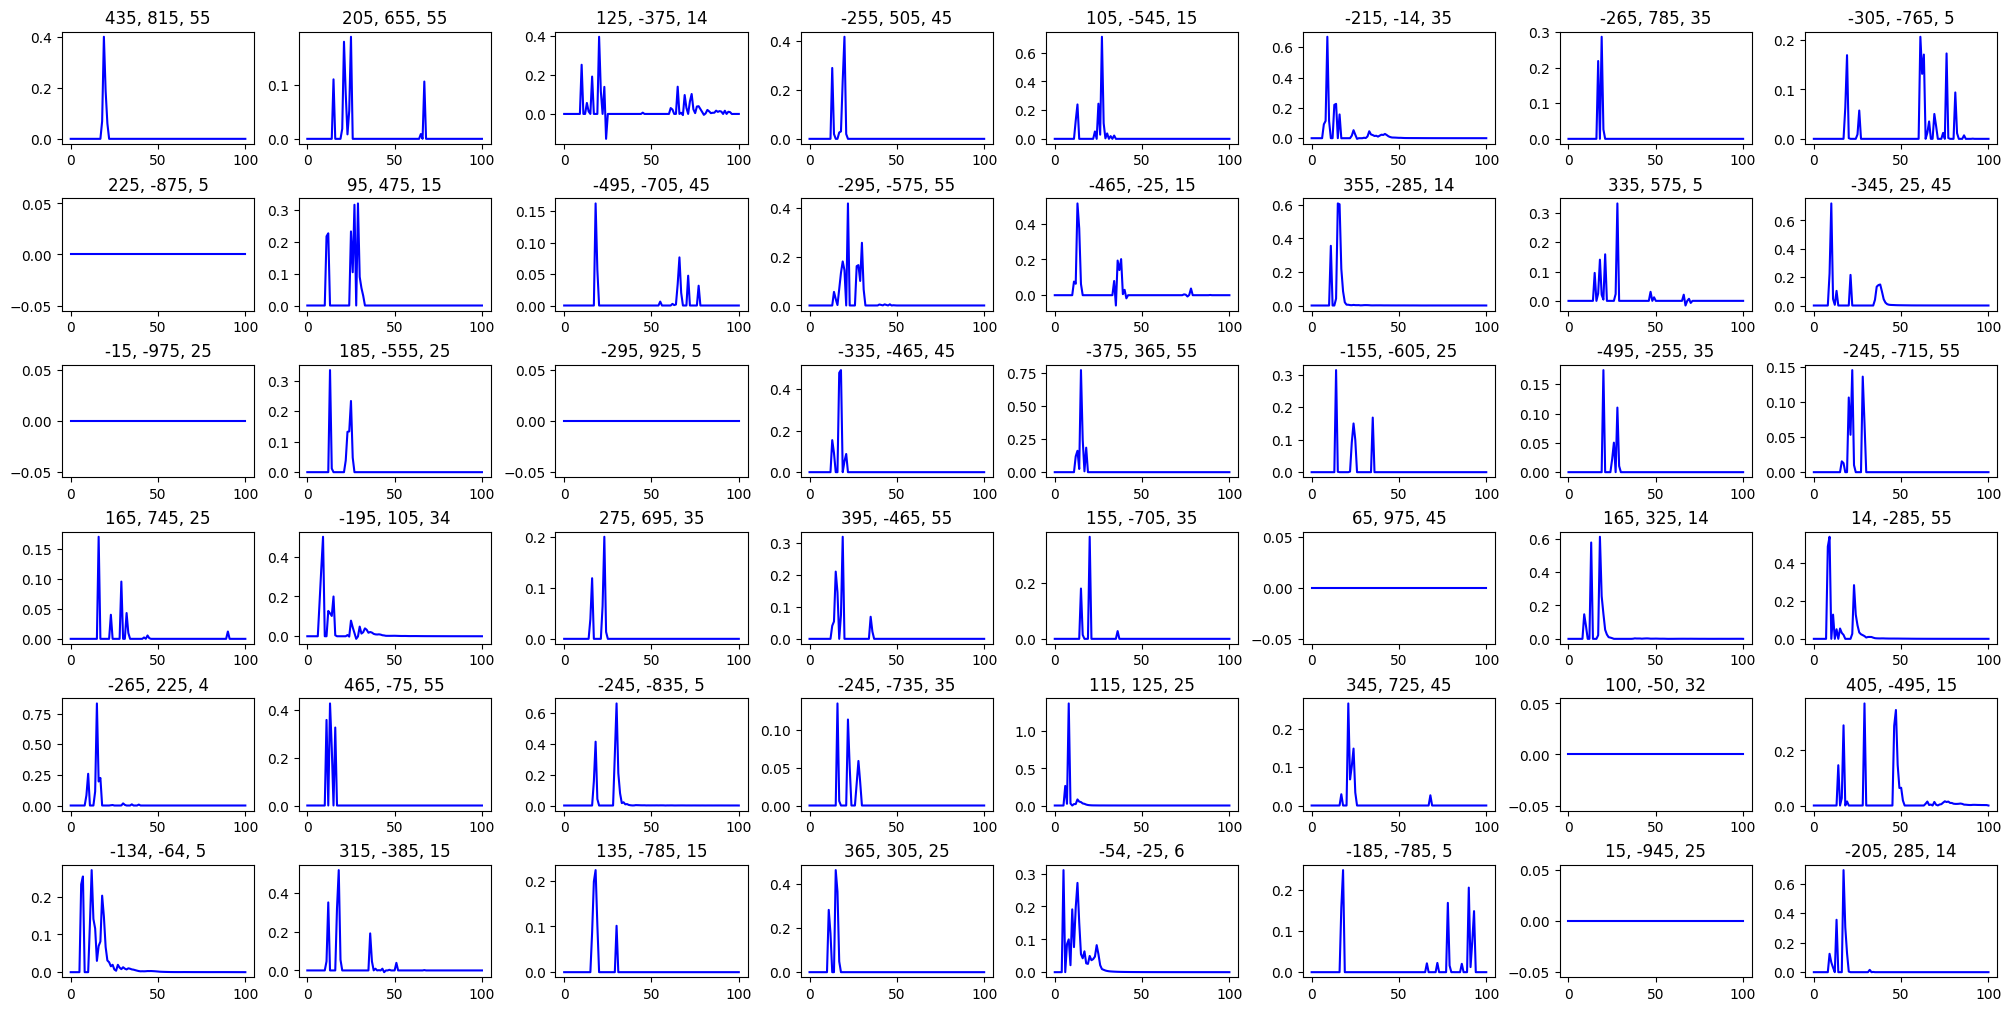

In [16]:
data = np.load('/home/jovyan/share/8TB-share/qilin/fragment/npz/060/000_60_5_0.4C50.npz')
gt_strain = data['strains']
gt_strain = gt_strain[1:, :] - gt_strain[:-1, :]
fig = plt.figure(figsize=(20,10), constrained_layout=True)
idx = random.sample(range(123068), 48)

for fig_id in range(48):
    ax = fig.add_subplot(6, 8, fig_id+1)
    x, y, z = gt_pos[0, idx[fig_id]]
    x, y, z = int(x), int(y), int(z)
    ax.set_title(f'{x}, {y}, {z}')
    ax.plot(gt_strain[:, idx[fig_id]], 'b')

# Extract image from gif

In [45]:
from PIL import Image

# Open the GIF file
idx = 1
gif_path = f'/home/jovyan/work/gns-fragment/rollouts/Fragment/rollout_0_one_step.gif'
gif = Image.open(gif_path)

# Iterate over each frame in the GIF
frame_images = []
for frame_index in range(gif.n_frames):
    # Go to the current frame
    gif.seek(frame_index)

    # Extract the current frame as an image
    frame_image = gif.copy()
    frame_images.append(frame_image)

# Save each frame as an individual image
output_dir = '/home/jovyan/work/gns-fragment/rollouts/Fragment/'
for i, frame_image in enumerate(frame_images):
    frame_image.save(f'{output_dir}rollout_{idx:02}_frame_{i:02}.png')

In [2]:
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt

path = '/home/jovyan/work/gns-fragment/rollouts/Fragment/Step-0-100-3/rollout_0.pkl'

with open(path, "rb") as file:
    rollout_data = pickle.load(file)

init_pos = rollout_data['initial_positions']
pred_pos = rollout_data['predicted_rollout']
gt_pos = rollout_data['ground_truth_rollout']
gt_pos = np.concatenate((init_pos, gt_pos), axis=0)
pred_pos = np.concatenate((init_pos, pred_pos), axis=0)
trajectory = gt_pos

In [ ]:
connected_distance = 10.1  # Distance threshold for initial particle connection

num_timesteps, num_particles = trajectory.shape[:2]

# Create an initial connectivity matrix
initial_connectivity = np.zeros((num_particles, num_particles), dtype=bool)
initial_distances = np.linalg.norm(trajectory[0] - trajectory[0][:, np.newaxis], axis=-1)
initial_connectivity[initial_distances <= connected_distance] = True

# Compute the connectivity in the last step based on the initial connectivity
last_step_connectivity = np.zeros_like(initial_connectivity, dtype=bool)
last_step_distances = np.linalg.norm(trajectory[-1] - trajectory[-1][:, np.newaxis], axis=-1)
last_step_connectivity[last_step_distances <= connected_distance] = True

# Identify fragments based on broken connections in the last step
fragments = []
visited = set()

# Iterate through each particle to identify fragments
for particle in range(num_particles):
    if particle not in visited:
        fragment = []
        stack = [particle]
        while stack:
            p = stack.pop()
            fragment.append(p)
            visited.add(p)
            connected_particles = np.where(last_step_connectivity[p])[0]
            for connected_particle in connected_particles:
                if connected_particle not in visited:
                    stack.append(connected_particle)
        fragments.append(fragment)

# Print the fragments in the last step
for i, fragment in enumerate(fragments):
    print(f"Fragment {i+1}: {fragment}")